In [1]:
from interpolate_matrix import eps
import interpolate_matrix as int
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eta_e = 0.1
eta_m = -0.1
def fd_e(x):
    return 1/(np.exp(x-eta_e)+1)
def fd_m(x):
    return 1/(np.exp(x-eta_m)+1)

def f_exp_e(x):
    return np.exp(-x)/10
def f_exp_m(x):
    return 8 * np.exp(-2*x)/10

def f_gm_e(x):
    return np.sqrt(fd_e(x) * f_exp_e(x))
def f_gm_m(x):
    return np.sqrt(fd_m(x) * f_exp_m(x))

The initial conditions have
$$ \rho_\epsilon = \left( \begin{array}{cc} f_e (\epsilon) & 0 \\ 0 & f_\mu (\epsilon) \end{array} \right) = \frac{1}{2} P_0 (\epsilon) \big( 1 + P_z (\epsilon) \sigma_z \big) \quad \Rightarrow \quad P_0 (\epsilon) = f_e (\epsilon) + f_\mu (\epsilon), ~P_z (\epsilon) = (f_e (\epsilon) - f_\mu (\epsilon)) / P_0 (\epsilon)$$
We explore two interpolation schemes: 
- **fitting P**: fitting $P_0$ and $P_z$ directly
- **fitting matrix**: converting $P_0$ and $P_z$ into the two diagonal elements of the matrix, fitting the the matrix elements, then converting to interpolated values of $P_0$ and $P_z$.

Further, interpolating schemes which fit on the log when the interpolating values all have the same sign, otherwise fitting on the value if the sign changes:
- **log linear**: take the points before and after interpolation point to perform a linear fit
- **log fifth**: a polynomial interpolation scheme involving five interpolating points (so, quartic polynomial fit): three before the point and two after it.

Start with Fermi-Dirac spectra,
$$ f = \frac{1}{e^{\epsilon - \eta}+1} \qquad \eta_e = 0.01,~\eta_\mu = -0.01$$

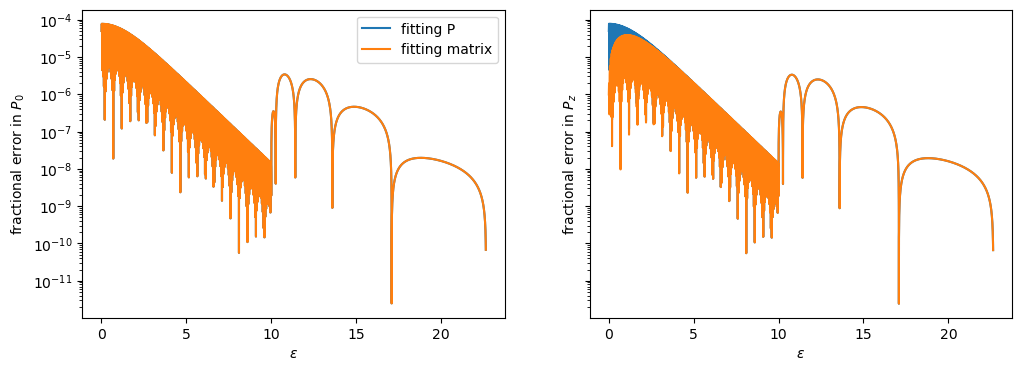

In [3]:
rho = int.dens_array(eps, fd_e, fd_m)
int.diff_plots(eps, rho, fd_e, fd_m, int.interpolate_log_linear)

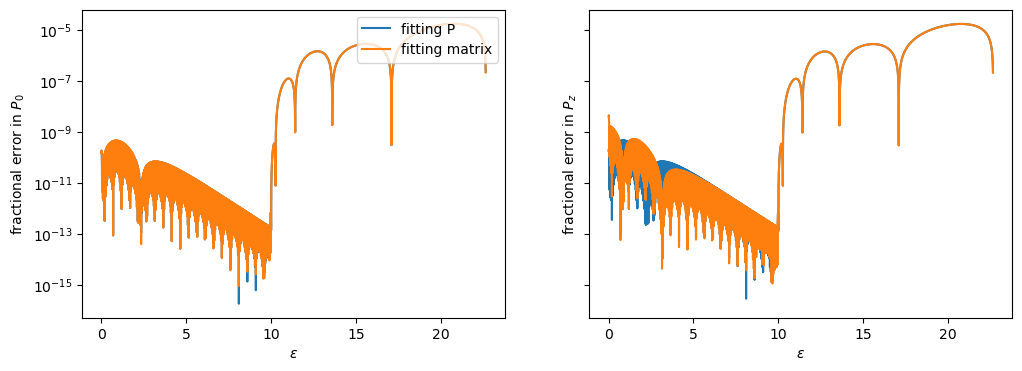

In [4]:
int.diff_plots(eps, rho, fd_e, fd_m, int.interpolate_log_fifth)

In the linspace part of the epsilons, the fifth order scheme is approroximately 4-5 orders of magnitude better, however, in the Gauss-Laguerre tail, the fit is better for linear. There is very little difference in the fitting P versus fitting matrix methods, except for small epsilon in fitting Pz with linear.

Now, try the exponential distributions, normalized so that their integrals, $\int f~\epsilon^2 \, d \epsilon$, match,
$$ f_e (\epsilon) = \frac{1}{10} e^{-\epsilon} \qquad f_\mu (\epsilon) = \frac{8}{10} e^{-2 \epsilon} ,$$
and that $f < 1$ for all $\epsilon$, as is required for fermion statistics.

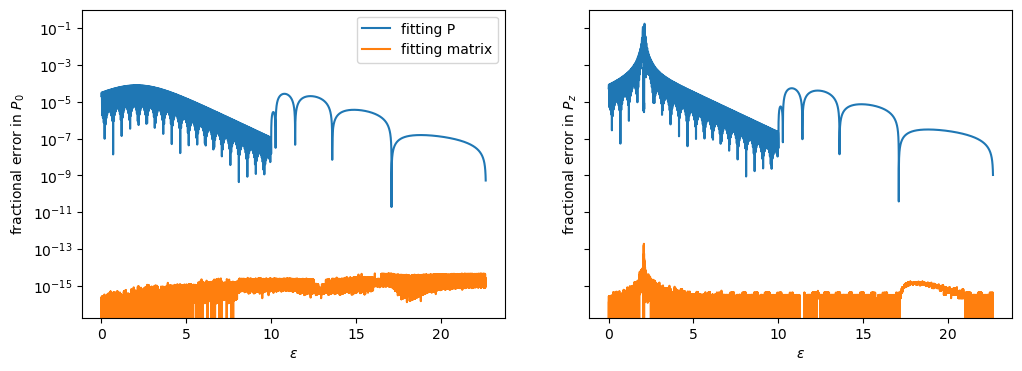

In [5]:
rho = int.dens_array(eps, f_exp_e, f_exp_m)
int.diff_plots(eps, rho, f_exp_e, f_exp_m, int.interpolate_log_linear)

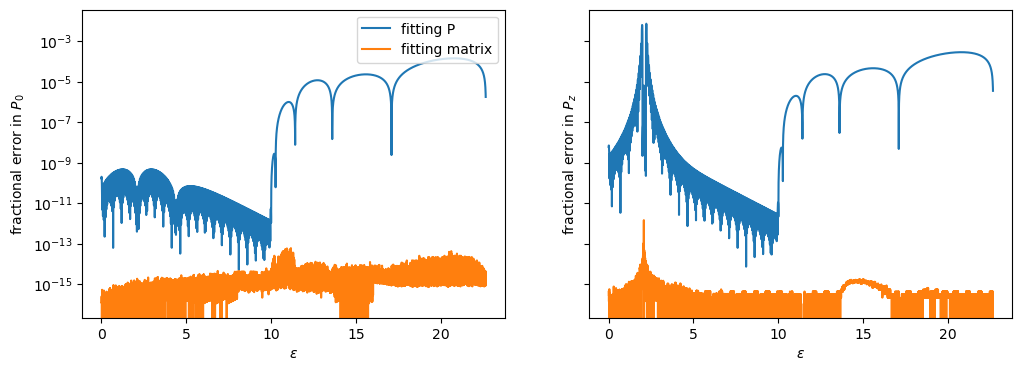

In [6]:
res = int.diff_plots(eps, rho, f_exp_e, f_exp_m, fun=int.interpolate_log_fifth, return_Pz_absolute=True)

Unsurprisingly, the fit on the matrix is superior, and the fractional errors are all consistent with zero. Why? the diagonal entries in the matrix are exponentials and we are using log-polynomial fits of an exponential, which are perfect within computational rounding errors. Something weird happens near $\epsilon = 3$ in fitting $P_z$, but this is a result of the deficiencies of fractional difference when the true value crosses zero, as can be seen:

Text(0, 0.5, '$P_z$')

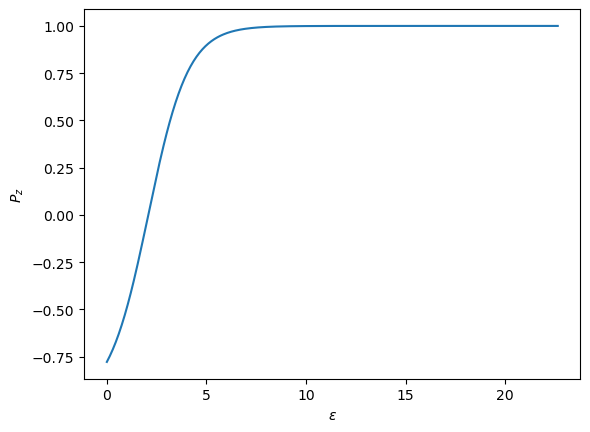

In [7]:
plt.plot(eps, (f_exp_e(eps)-f_exp_m(eps))/(f_exp_e(eps)+f_exp_m(eps)))
plt.xlabel(r"$\epsilon$") 
plt.ylabel(r"$P_z$")

We can see that the absolute errors don't spike so much (here using the fifth order fitting method):

Text(0.5, 0, '$\\epsilon$')

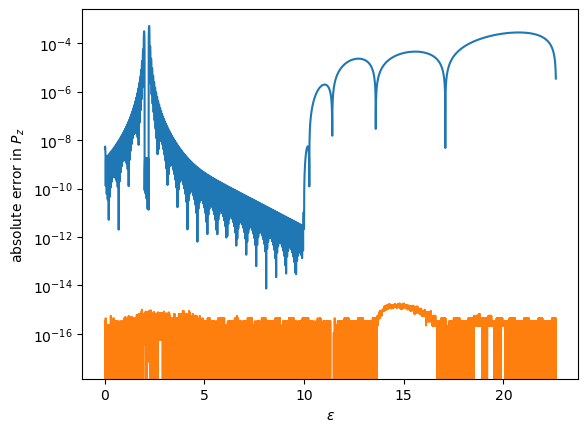

In [8]:
plt.semilogy(res[0], np.abs(res[1]))
plt.semilogy(res[0], np.abs(res[2]))
plt.ylabel(r"absolute error in $P_z$")
plt.xlabel(r"$\epsilon$")

Trying something different, let's use a distribution that is the geometric mean of the Fermi-Dirac and exponential distributions:

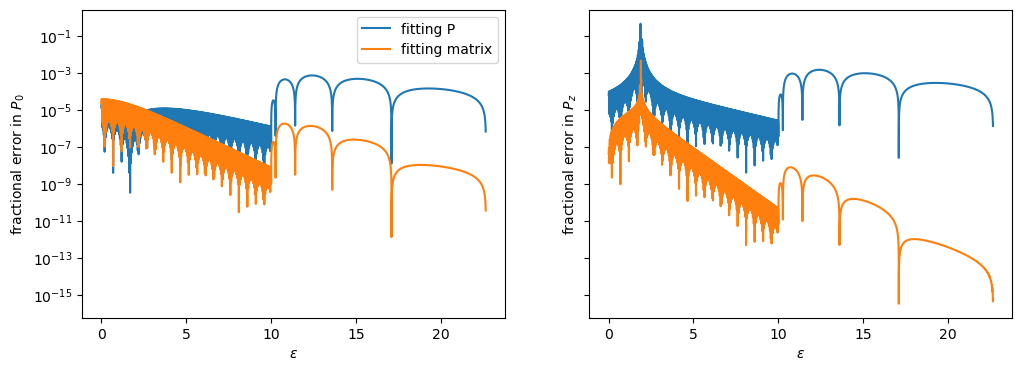

In [9]:
rho = int.dens_array(eps, f_gm_e, f_gm_m)
int.diff_plots(eps, rho, f_gm_e, f_gm_m, int.interpolate_log_linear)

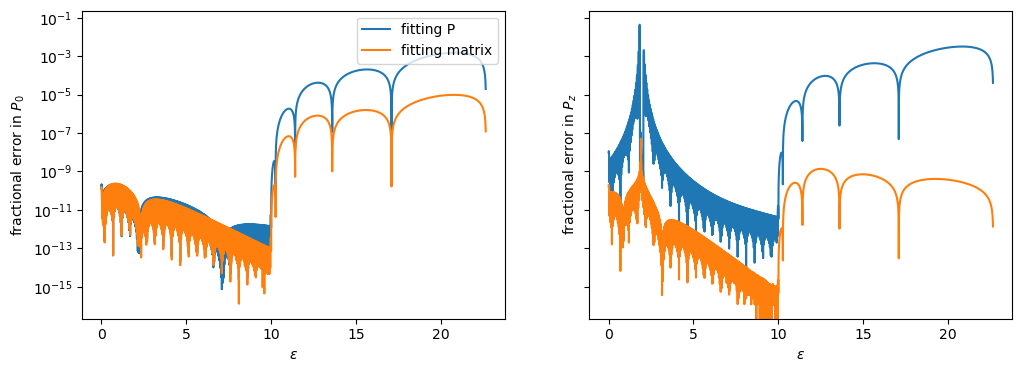

In [10]:
int.diff_plots(eps, rho, f_gm_e, f_gm_m, int.interpolate_log_fifth)

This seems to imply that the best fitting scheme may be:
- fitting on the matrix (which has the benefit of fitting non-negative numbers)
- using the fifth order scheme for the linearly spaced part of epsilon
- using linear scheme for the Gauss-Laguerre
here's the results of the scheme (for comparison, with fitting P)

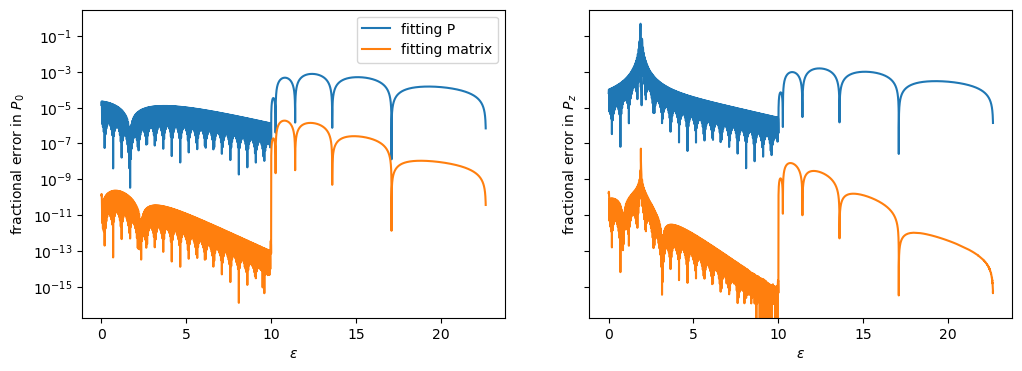

In [11]:
int.diff_plots(eps, rho, f_gm_e, f_gm_m, fun_comp=int.do_interpolation)